In [34]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [26]:
iris = datasets.load_iris()
features = iris.data 
target = iris.target

sepal_length = np.array(features[:, 0])
petal_width = np.array(features[:, 3])

species_names = list()

for i in target:
    if i == 0:
        species_names.append('setosa')
    elif i == 1:
        species_names.append('versicolor')
    else:
        species_names.append('virginica')

In [27]:
def predict(intercept, coefficient, dataset):
    return np.array([intercept + coefficient * x for x in dataset])

def create_batches(x, y, batch_size):
    x_batches = np.array_split(x, len(x) // batch_size)
    y_batches = np.array_split(y, len(y) // batch_size)
    return x_batches, y_batches

def mbgd(x, y, epochs, df, batch_size, alpha = 0.01):
    intercept = 7.5
    coefficient = 7.5
    predictions = predict(intercept, coefficient, x)
    sum_error = np.sum((predictions - y) ** 2) / (2 * batch_size)
    df.loc[0] = [-1, intercept, coefficient, sum_error]

    x_batches, y_batches = create_batches(x, y, batch_size)
    index = 1
    for epoch in range(epochs):
        for x, y in zip(x_batches, y_batches):
            sum_error = 0.0
            predictions = predict(intercept, coefficient, x)
            b0_error = (1/batch_size) * np.sum(predictions - y)
            b1_error = (1/batch_size) * np.sum((predictions - y) * x)
            intercept = intercept - alpha * b0_error
            coefficient = coefficient - alpha * b1_error 
            sum_error = sum_error + np.sum((predictions - y) ** 2) / (2 * batch_size)
            df.loc[index] = [int(epoch), intercept, coefficient, sum_error]
            index += 1
    return df

In [28]:
epochs = 10000
mbgd_loss = pd.DataFrame(columns=['epoch', 'intercept', 'coefficient', 'sum_error'])
mbgd_loss = mbgd(sepal_length, petal_width, epochs = epochs, batch_size=64, df = mbgd_loss)
mbgd_loss['epoch'] = mbgd_loss['epoch'].astype(int)

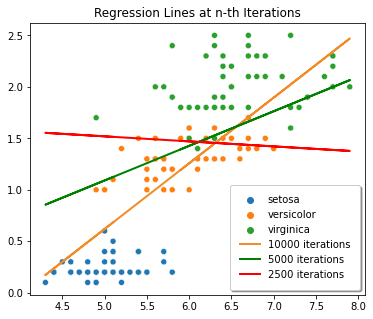

In [29]:
maxx = epochs-1
half = int(epochs / 2)
quarter = int(epochs / 4)

plt.figure(figsize=(6,5))

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    mbgd_loss['intercept'][maxx] + mbgd_loss['coefficient'][maxx] * sepal_length,
    '#f28c28',
    linewidth = 2,
    label = f'{maxx + 1} iterations'
)

plt.plot(
    sepal_length, 
    mbgd_loss['intercept'][half] + mbgd_loss['coefficient'][half] * sepal_length,
    '-g',
    linewidth = 2,
    label = f'{half} iterations'
)

plt.plot(
    sepal_length, 
    mbgd_loss['intercept'][quarter] + mbgd_loss['coefficient'][quarter] * sepal_length,
    '-r',
    linewidth = 2,
    label = f'{quarter} iterations'
)

plt.title("Regression Lines at n-th Iterations")

plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

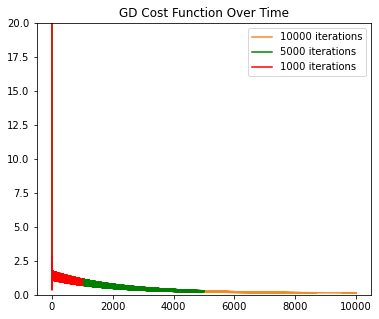

In [30]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(0, 10000), mbgd_loss['sum_error'][:10000], color = '#f28c28', label = '10000 iterations')
# plt.fill_between(np.arange(0, 10000), mbgd_loss['sum_error'][:10000], step="pre", alpha = 0.5, color = '#f28c28')

plt.plot(np.arange(0, 5000), mbgd_loss['sum_error'][:5000], color = 'green', label = '5000 iterations')
# plt.fill_between(np.arange(0, 5000), mbgd_loss['sum_error'][:5000], step="pre", alpha = 0.5, color = 'green')

plt.plot(np.arange(0, 1000), mbgd_loss['sum_error'][:1000], color = 'red', label = '1000 iterations')
# plt.fill_between(np.arange(0, 1000), mbgd_loss['sum_error'][:1000], step="pre", alpha = 0.5, color = 'red')

plt.title(f'GD Cost Function Over Time')
plt.ylim(0, 20)
plt.legend()

(4.2, 8.0)

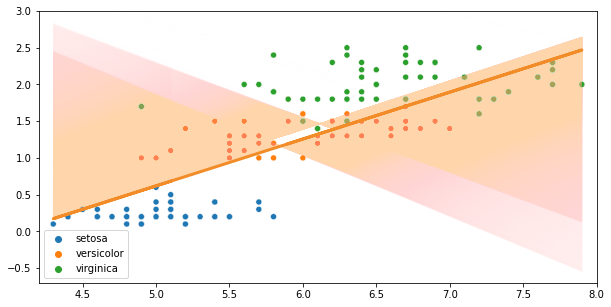

In [37]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

for i in range(0, 9999):
    # plot the regression line
    plt.plot(
        sepal_length, 
        mbgd_loss['intercept'][i] + mbgd_loss['coefficient'][i] * sepal_length,
        color = '#ffd5ab',
        linestyle = '-',
        lw = 1,
        alpha = 0.01
    )

plt.plot(
    sepal_length, 
    mbgd_loss['intercept'][9999] + mbgd_loss['coefficient'][9999] * sepal_length,
    color = '#f28c28',
    lw = 3,
    linestyle = '-'
)

plt.ylim(-0.7, max(petal_width) + 0.5)
plt.xlim(min(sepal_length) - 0.1, max(sepal_length) + 0.1)

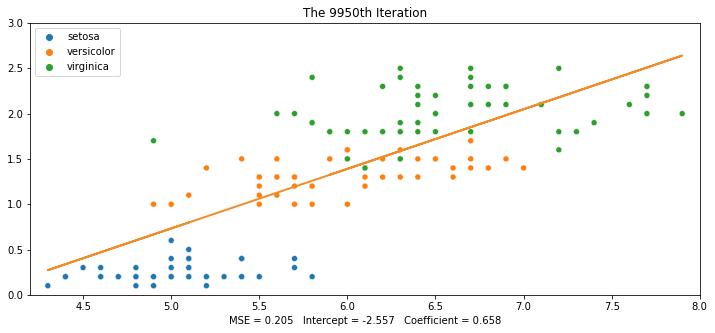

In [36]:
fig, ax = plt.subplots(figsize=(12,5))
plt.xlim(min(sepal_length) - 0.1, max(sepal_length) + 0.1)
plt.ylim(0, max(petal_width) + 0.5)

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

line, = ax.plot(
    sepal_length, 
    mbgd_loss['intercept'][0] + mbgd_loss['coefficient'][0] * sepal_length,
    color="#f28c28", 
    linestyle='-',
    linewidth = 2, 
    label = 'regression line'
)

def update(frame_num):
    regline = mbgd_loss['intercept'].loc[frame_num] + mbgd_loss['coefficient'].loc[frame_num] * sepal_length
    line.set_ydata(regline)
    plt.title(f"The {frame_num}th Iteration")
    plt.xlabel(f"MSE = {mean_squared_error(regline, petal_width):.3f}   Intercept = {mbgd_loss['intercept'].loc[frame_num]:.3f}   Coefficient = {mbgd_loss['coefficient'].loc[frame_num]:.3f}")
    return line, ax

anim = FuncAnimation(fig, update, repeat = True, frames=np.arange(0, 10000, 50), interval=10)
anim.save(
    './mbgd.gif', 
    writer = PillowWriter(fps=60), 
    dpi = 150
)
plt.show()

In [ ]:
# generate a mean squared error contour surface
intercepts = np.linspace(-10, 10, 10)
coefficients = np.linspace(-10, 10, 10)
x, y = np.meshgrid(intercepts, coefficients)
z = np.zeros(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i, j] = mean_squared_error(predict(x[i, j], y[i, j], sepal_length), petal_width)

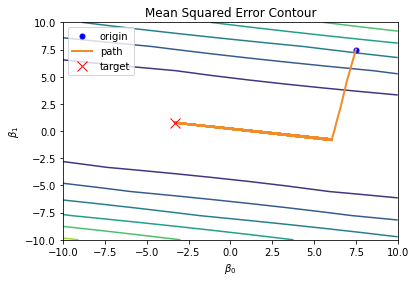

In [ ]:
plt.contour(x, y, z)
plt.title("Mean Squared Error Contour")
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.plot(mbgd_loss['intercept'][0], mbgd_loss['coefficient'][0], "o", markersize=5, color="blue", label="origin")
plt.plot(mbgd_loss['intercept'][0:len(mbgd_loss)-2], mbgd_loss['coefficient'][0:len(mbgd_loss)-2], color="#f28c28", linewidth=2, label="path")
plt.plot(mbgd_loss['intercept'][len(mbgd_loss)-1], mbgd_loss['coefficient'][len(mbgd_loss)-1], 'x', markersize=10, color='red', label="target")
plt.legend()

In [ ]:
print(mbgd_loss.iloc[-1])

epoch          9999.000000
intercept        -3.325443
coefficient       0.783575
sum_error         0.145090
Name: 20000, dtype: float64
